<a href="https://colab.research.google.com/github/mrSJB007/CBT-CIP/blob/main/CBT-spamail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : SUBHAJIT BASAK

TASK-4: SPAM MAIL DETECTION WITH MACHINE LEARNING

In [1]:
import pandas as pd
data = pd.read_csv('Spam Email Detection - spam.csv')

print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [2]:
data.shape

(5572, 5)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5163,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
data = data[['v1', 'v2']]

In [6]:
data.columns = ['label', 'text']

In [7]:
print(data.isnull().sum())

label    0
text     0
dtype: int64


In [11]:
data.duplicated().sum()

426

In [12]:
data=data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [10]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

data['text'] = data['text'].apply(preprocess_text)
print(data.head())

  label                                               text
0   ham  go until jurong point crazy available only in ...
1   ham                           ok lar joking wif u oni 
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham       u dun say so early hor u c already then say 
4   ham  nah i don t think he goes to usf he lives arou...


In [13]:
data.shape

(5146, 2)

In [14]:
data['label'].value_counts()

label
ham     4504
spam     642
Name: count, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5146 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5146 non-null   object
 1   text    5146 non-null   object
dtypes: object(2)
memory usage: 120.6+ KB


In [16]:
data.describe()

,label,text
count,5146,5146
unique,2,5146
top,ham,go until jurong point crazy available only in ...
freq,4504,1


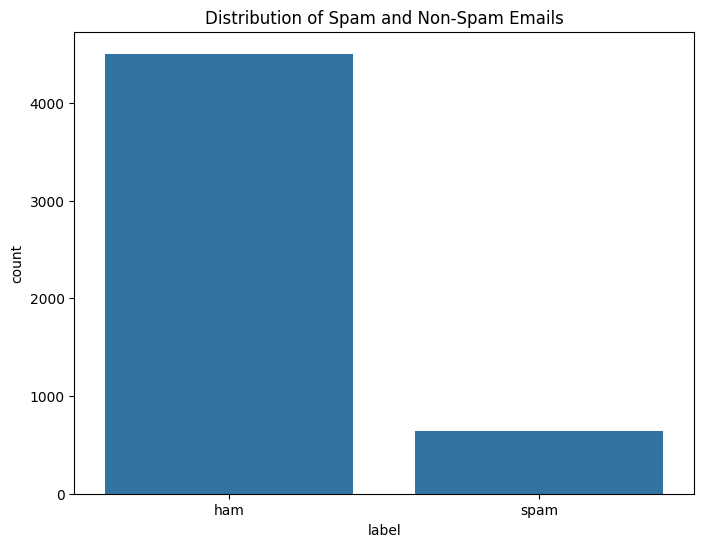

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

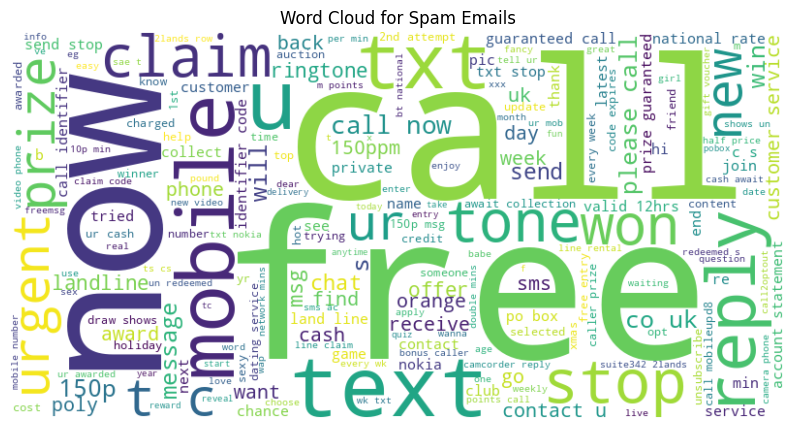

In [18]:
spam_text = ' '.join(data[data['label'] == 'spam']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

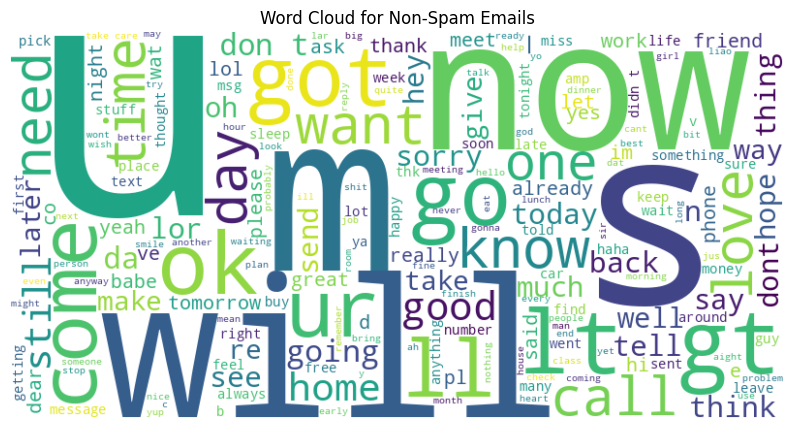

In [19]:
non_spam_text = ' '.join(data[data['label'] == 'ham']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Spam Emails')
plt.show()

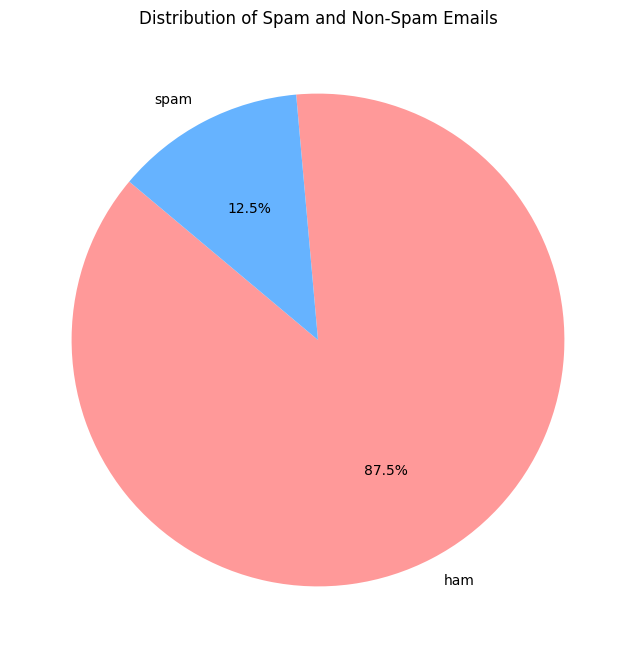

In [20]:
label_counts = data['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

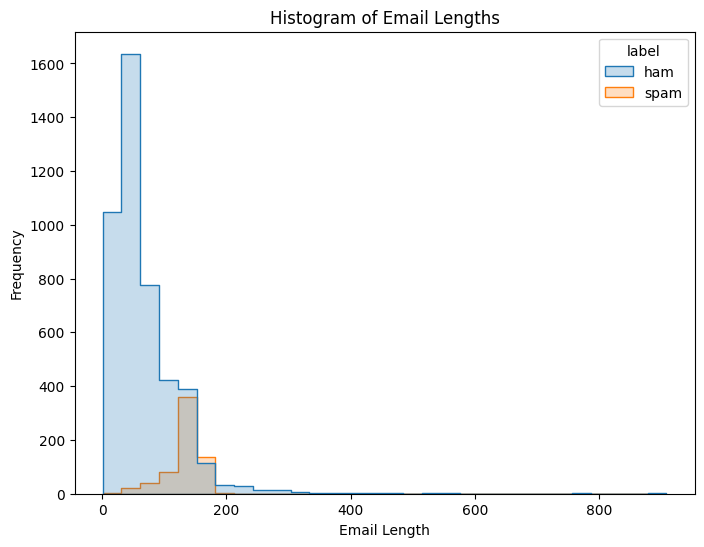

In [21]:
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='text_length', hue='label', element='step', bins=30)
plt.title('Histogram of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.97
Precision: 0.98
Recall: 0.77
F1 Score: 0.87


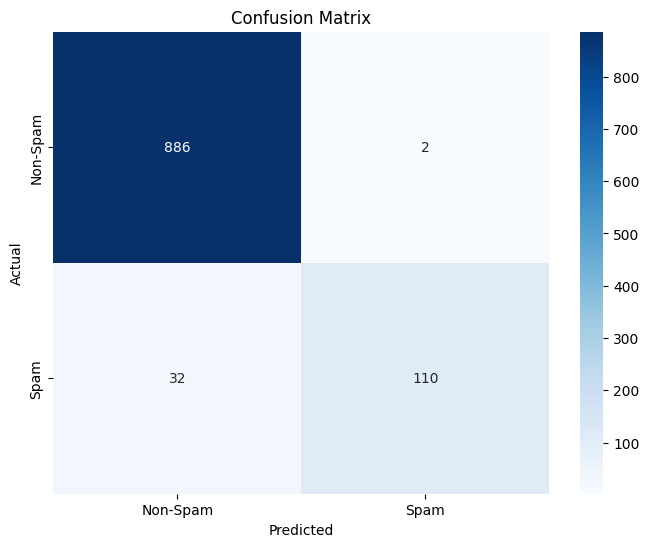

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
from collections import Counter

In [28]:
spam_words = ' '.join(data[data['label'] == 'spam']['text']).split()
spam_word_counts = Counter(spam_words)
spam_common_words = spam_word_counts.most_common(20)

In [29]:
non_spam_words = ' '.join(data[data['label'] == 'ham']['text']).split()
non_spam_word_counts = Counter(non_spam_words)
non_spam_common_words = non_spam_word_counts.most_common(20)

In [30]:
spam_common_df = pd.DataFrame(spam_common_words, columns=['word', 'count'])
non_spam_common_df = pd.DataFrame(non_spam_common_words, columns=['word', 'count'])

<ipython-input-31-6ff2e895c76f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=spam_common_df, palette='viridis')


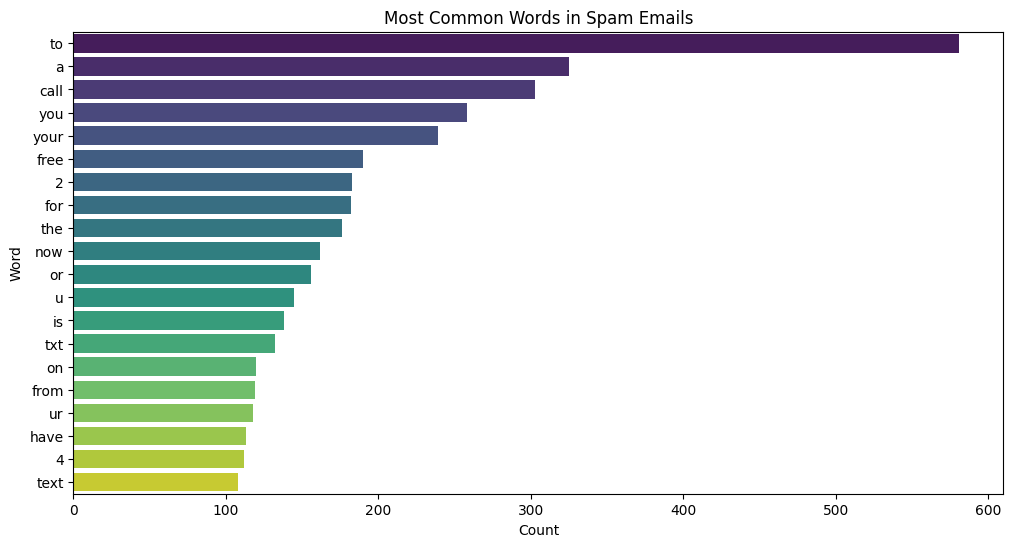

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=spam_common_df, palette='viridis')
plt.title('Most Common Words in Spam Emails')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

<ipython-input-32-52cdf0dd8866>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=non_spam_common_df, palette='viridis')


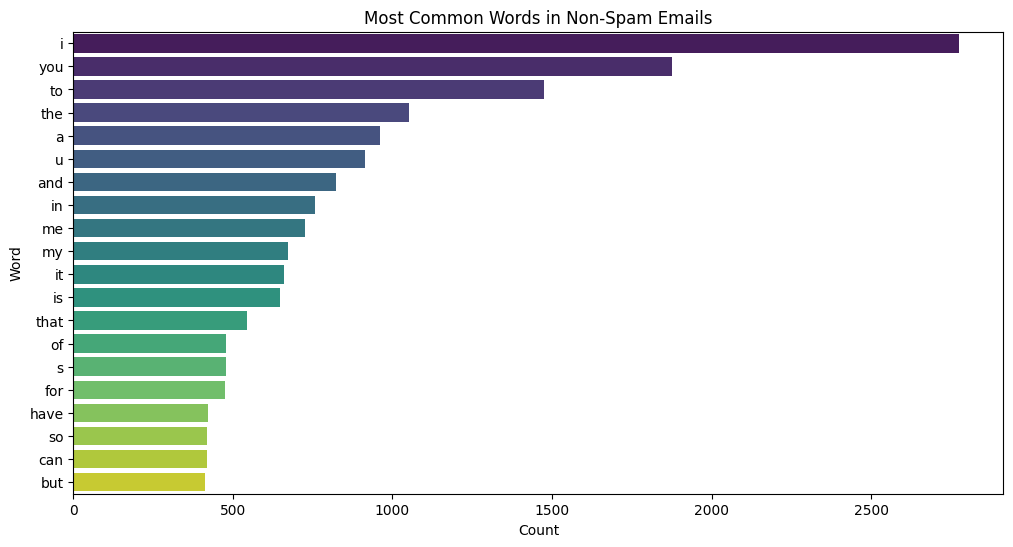

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=non_spam_common_df, palette='viridis')
plt.title('Most Common Words in Non-Spam Emails')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [33]:
from textblob import TextBlob
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity'] = data['text'].apply(get_polarity)

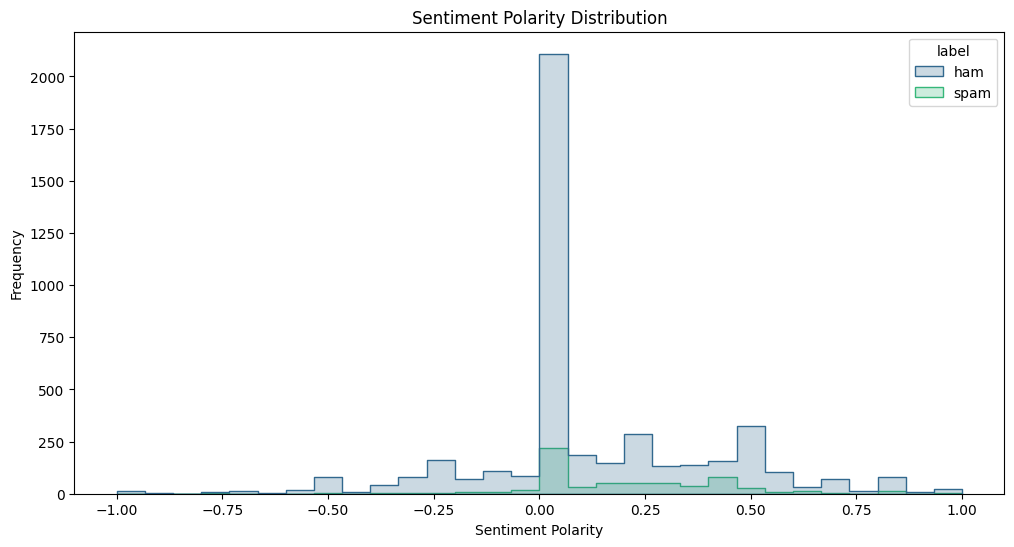

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='polarity', hue='label', element='step', bins=30, palette='viridis')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

<ipython-input-35-a7da19084c7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='polarity', data=data, palette='viridis')


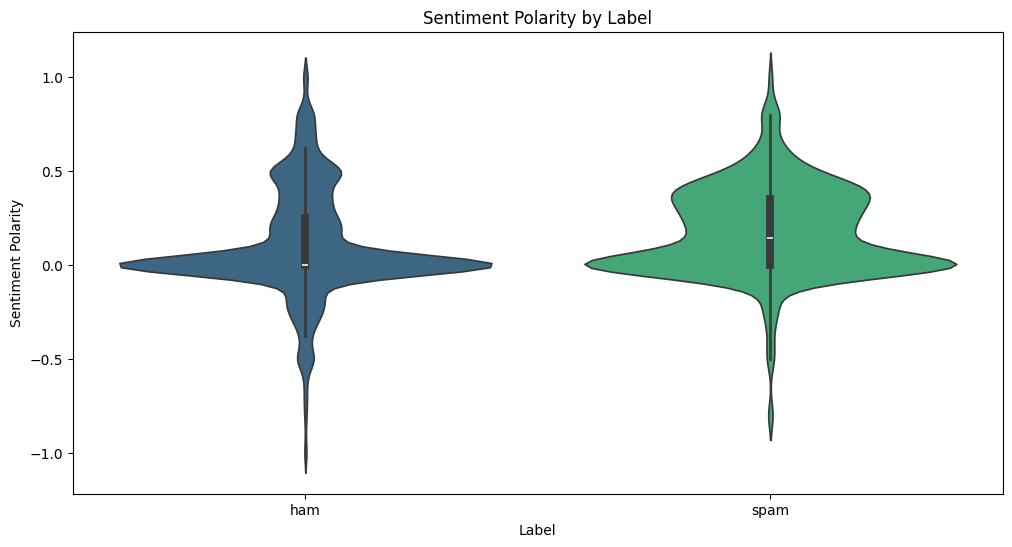

In [35]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='polarity', data=data, palette='viridis')
plt.title('Sentiment Polarity by Label')
plt.xlabel('Label')
plt.ylabel('Sentiment Polarity')
plt.show()

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}

model_results = {}

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    model_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred_prob': y_pred_prob
    }

    print(f'{model_name} Results:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')
    print('-' + '-'*30)

Logistic Regression Results:
Accuracy: 0.97
Precision: 0.98
Recall: 0.77
F1 Score: 0.87
ROC AUC: 0.99
-------------------------------
Naive Bayes Results:
Accuracy: 0.97
Precision: 1.00
Recall: 0.79
F1 Score: 0.88
ROC AUC: 0.98
-------------------------------
SVM Results:
Accuracy: 0.98
Precision: 0.98
Recall: 0.88
F1 Score: 0.93
ROC AUC: 0.99
-------------------------------
Random Forest Results:
Accuracy: 0.98
Precision: 0.98
Recall: 0.85
F1 Score: 0.91
ROC AUC: 0.99
-------------------------------


In [39]:
results_df = pd.DataFrame(model_results).T
print(results_df)

                     accuracy precision    recall        f1   roc_auc  \
Logistic Regression   0.96699  0.982143  0.774648  0.866142   0.99318   
Naive Bayes          0.970874       1.0  0.788732   0.88189  0.981657   
SVM                  0.981553  0.984252  0.880282  0.929368  0.994599   
Random Forest        0.976699  0.975806  0.852113  0.909774  0.994655   

                                                           y_pred_prob  
Logistic Regression  [0.03142587625031057, 0.019910781447455016, 0....  
Naive Bayes          [0.010229449586924023, 0.00559292664895573, 0....  
SVM                  [0.0014067963690549091, 0.0005817864235306455,...  
Random Forest        [0.0, 0.0, 0.002, 0.05, 0.0, 0.089954698079698...  


In [40]:
for model_name, result in model_results.items():
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_test, models[model_name].predict(X_test_tfidf), target_names=['ham', 'spam']))
    print('-' + '-'*30)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       888
        spam       0.98      0.77      0.87       142

    accuracy                           0.97      1030
   macro avg       0.97      0.89      0.92      1030
weighted avg       0.97      0.97      0.97      1030

-------------------------------
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       888
        spam       1.00      0.79      0.88       142

    accuracy                           0.97      1030
   macro avg       0.98      0.89      0.93      1030
weighted avg       0.97      0.97      0.97      1030

-------------------------------
Classification Report for SVM:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       888
        spam       0.98      0.88      0.93       142

 